# Salary Data

This machine learning(supervised learning) project has a dataset that shows the salary of different people from different works of life. At the end of the project, proper analysis would have been carried out, in other to develop a linear regression model that can accurately predict the salary of a individual. 

## About the Dataset

The dataset provides various attributes for 1000 different entities, and the attributes include:
- Education
- Experience(Years)
- Location
- Job_Title
- Age
- Gender
- Salary($)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("salary_prediction_data.csv")
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [4]:
print("There are ", df.duplicated().sum(), " duplicates in the dataset")

There are  0  duplicates in the dataset


In [5]:
df.describe(include="all")

,Education,Experience,Location,Job_Title,Age,Gender,Salary
count,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000
unique,4,NaN,3,4,NaN,2,NaN
top,High School,NaN,Suburban,Director,NaN,Male,NaN
freq,255,NaN,345,275,NaN,516,NaN
mean,NaN,14.771000,NaN,NaN,42.377000,NaN,105558.404239
std,NaN,8.341111,NaN,NaN,13.609412,NaN,28256.972075
min,NaN,1.000000,NaN,NaN,20.000000,NaN,33510.510669
25%,NaN,7.000000,NaN,NaN,30.000000,NaN,85032.141517
50%,NaN,15.000000,NaN,NaN,43.000000,NaN,104314.518315
75%,NaN,22.000000,NaN,NaN,55.000000,NaN,126804.047524


### 📌 Quick Observations

1. **No missing or duplicate records** were found in the dataset.
2. The dataset contains **4 unique education levels**, with **High School** being the most frequent.
3. **Experience ranges from 1 to 29 years**, with the **majority below 23 years**.
4. There are **3 unique locations**, with **Suburban** having the highest representation.
5. Among the **4 job titles**, **Director** is the most common.
6. The **age range** spans from **20 to 64 years**.
7. The dataset identifies **2 genders**, with **males** making up the higher proportion.
8. **Salary values** range from approximately **28,000** to **190,000**.


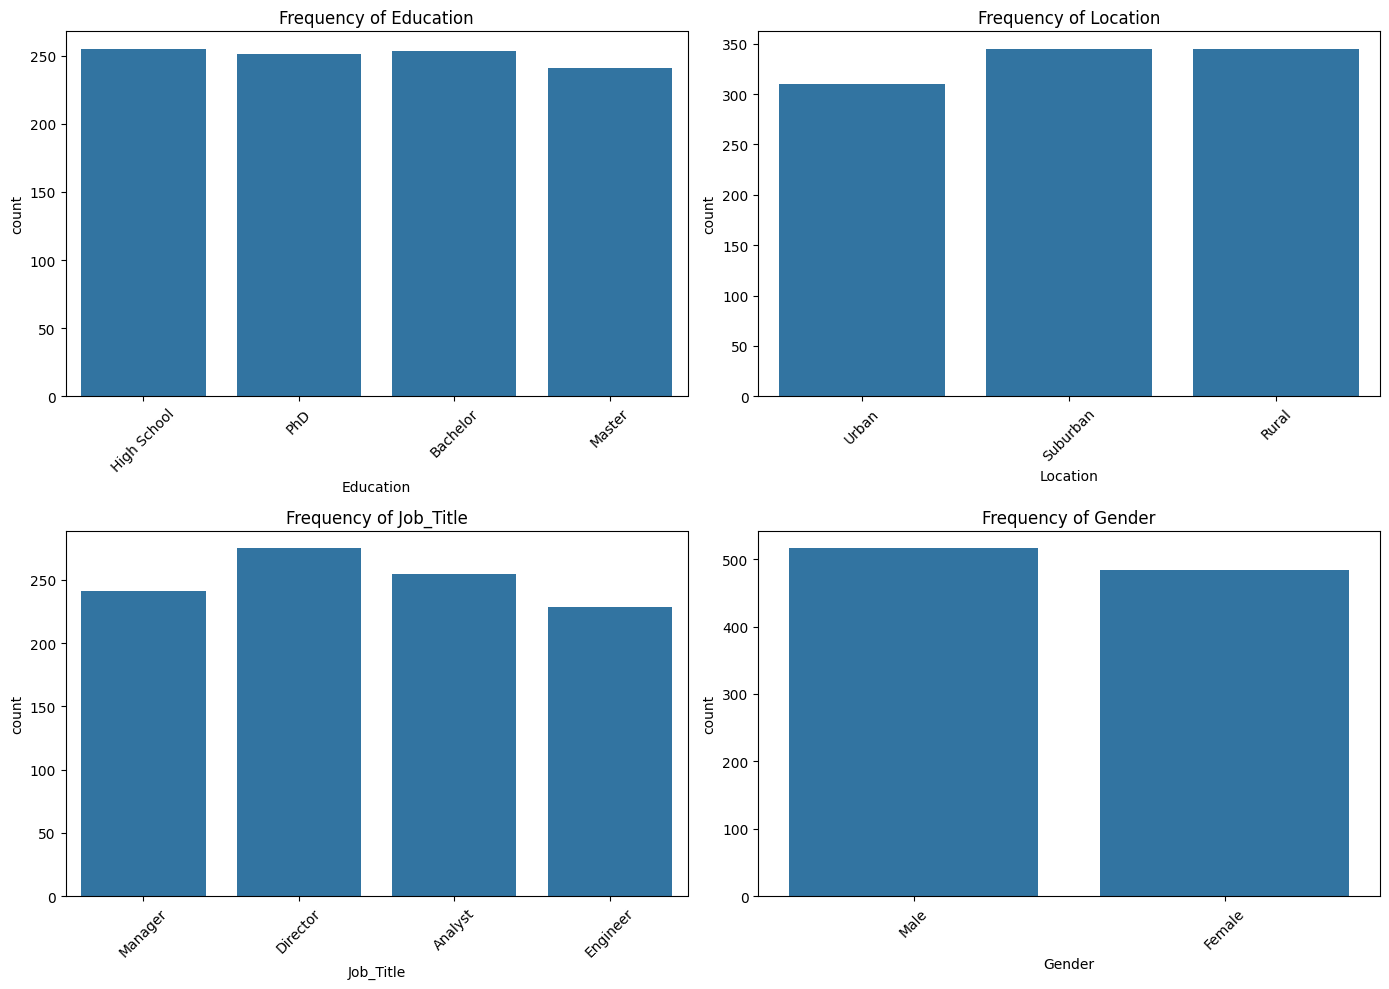

In [6]:
# List of your 4 categorical columns
cat_cols = ['Education', 'Location', 'Job_Title', 'Gender']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each countplot in its subplot
for i, col in enumerate(cat_cols):
    sn.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Frequency of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


> The distribution chart indicates that the dataset maintains a relatively uniform representation of categories across the Education, Location, Job Title, and Gender columns. This balance helps minimize sampling bias during modeling.

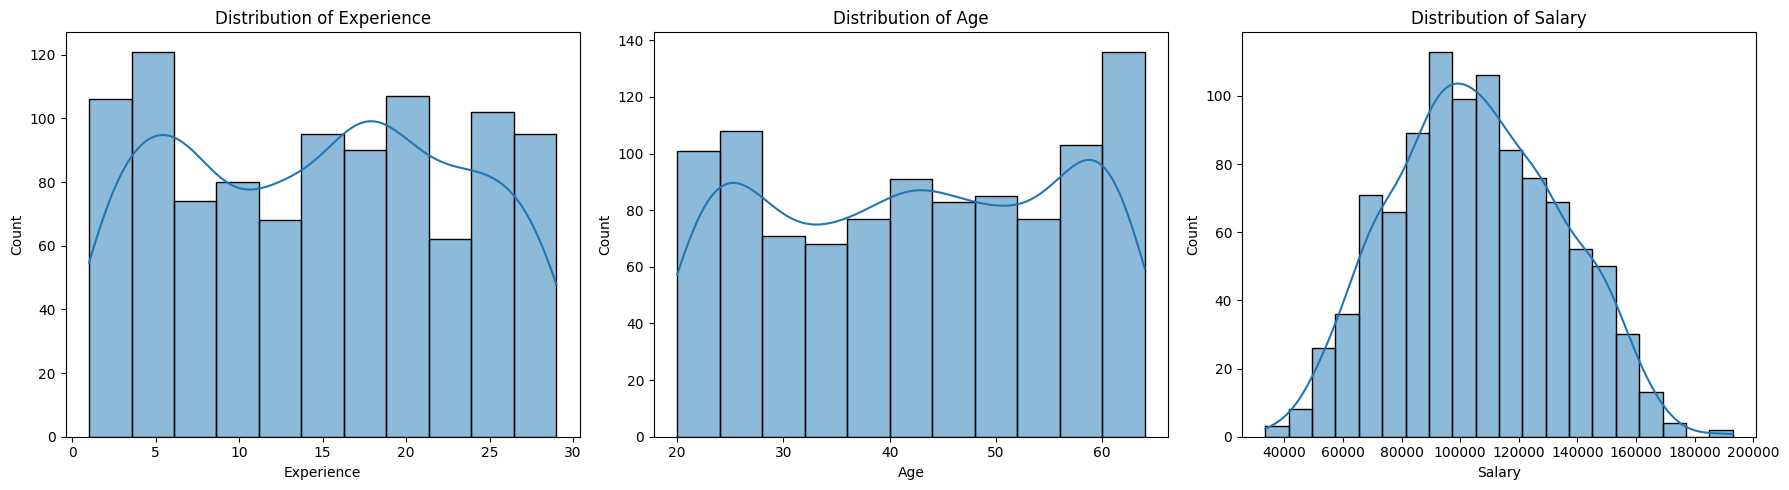

In [7]:
# List of your numerical columns
num_cols = ['Experience', 'Age', 'Salary']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot distributions
for i, col in enumerate(num_cols):
    sn.histplot(data=df, x=col, kde=True, ax=axes[i])  # Add kde=False if you want histogram only
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

> The distributions show that experience is fairly evenly spread with peaks at 2–5 and 18–21 years, age is bimodal with concentrations in the early 20s and late 50s to 60s, and salary follows a near-normal distribution centered around \$95,000–\$110,000 with most employees earning between \$70,000 and \$130,000 and a few high earners reaching up to \$190,000.


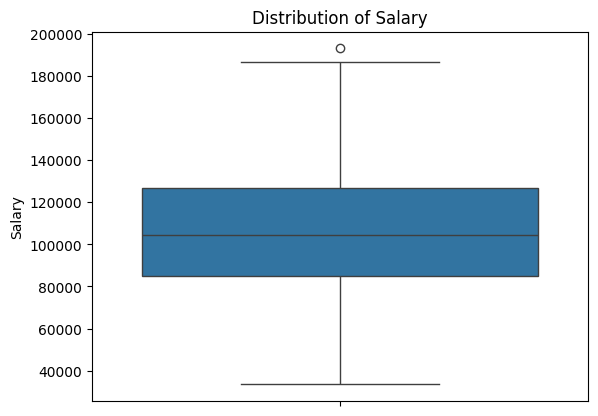

In [8]:
sn.boxplot(data=df, y='Salary')
plt.title('Distribution of Salary')
plt.show()

> The plot reveals a data point lying outside the whiskers of the box, suggesting the presence of an outlier. To determine whether this outlier is a legitimate observation or an anomaly, we examined records with salaries exceeding \$180,000. 

In [9]:
df[df["Salary"] >= 180000]

,Education,Experience,Location,Job_Title,Age,Gender,Salary
438,PhD,20,Suburban,Director,53,Female,193016.602150
603,PhD,29,Urban,Director,56,Male,186452.845727



> The analysis shows that these entries correspond to individuals holding Director positions with PhD qualifications, indicating they are likely at the peak of their careers. Given their senior roles and advanced education, such high earnings are plausible. Therefore, this outlier is justifiable and does not warrant removal from the dataset.


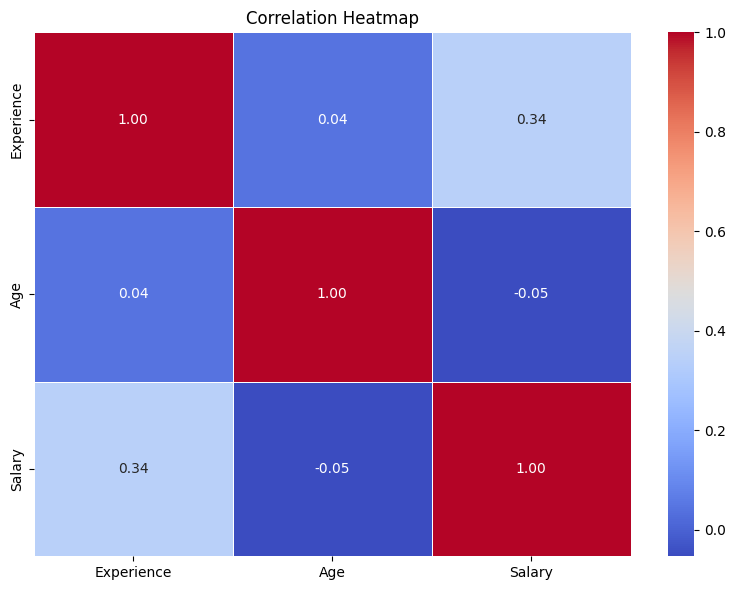

In [10]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

> The heatmap reveals a strong positive correlation between experience and salary, suggesting that as experience increases, salary tends to rise accordingly. In contrast, age shows little to no correlation with either salary or experience, a pattern that is further supported by the scatter plot, where no clear trend involving age is visible.


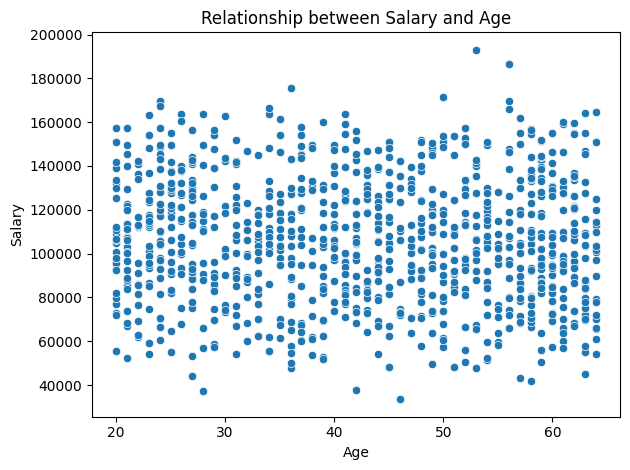

In [11]:
sn.scatterplot(data=df, x="Age", y="Salary")
plt.title("Relationship between Salary and Age")
plt.tight_layout()
plt.show()

>Furthermore, let's check how education, location, job title and gender relates with salary.

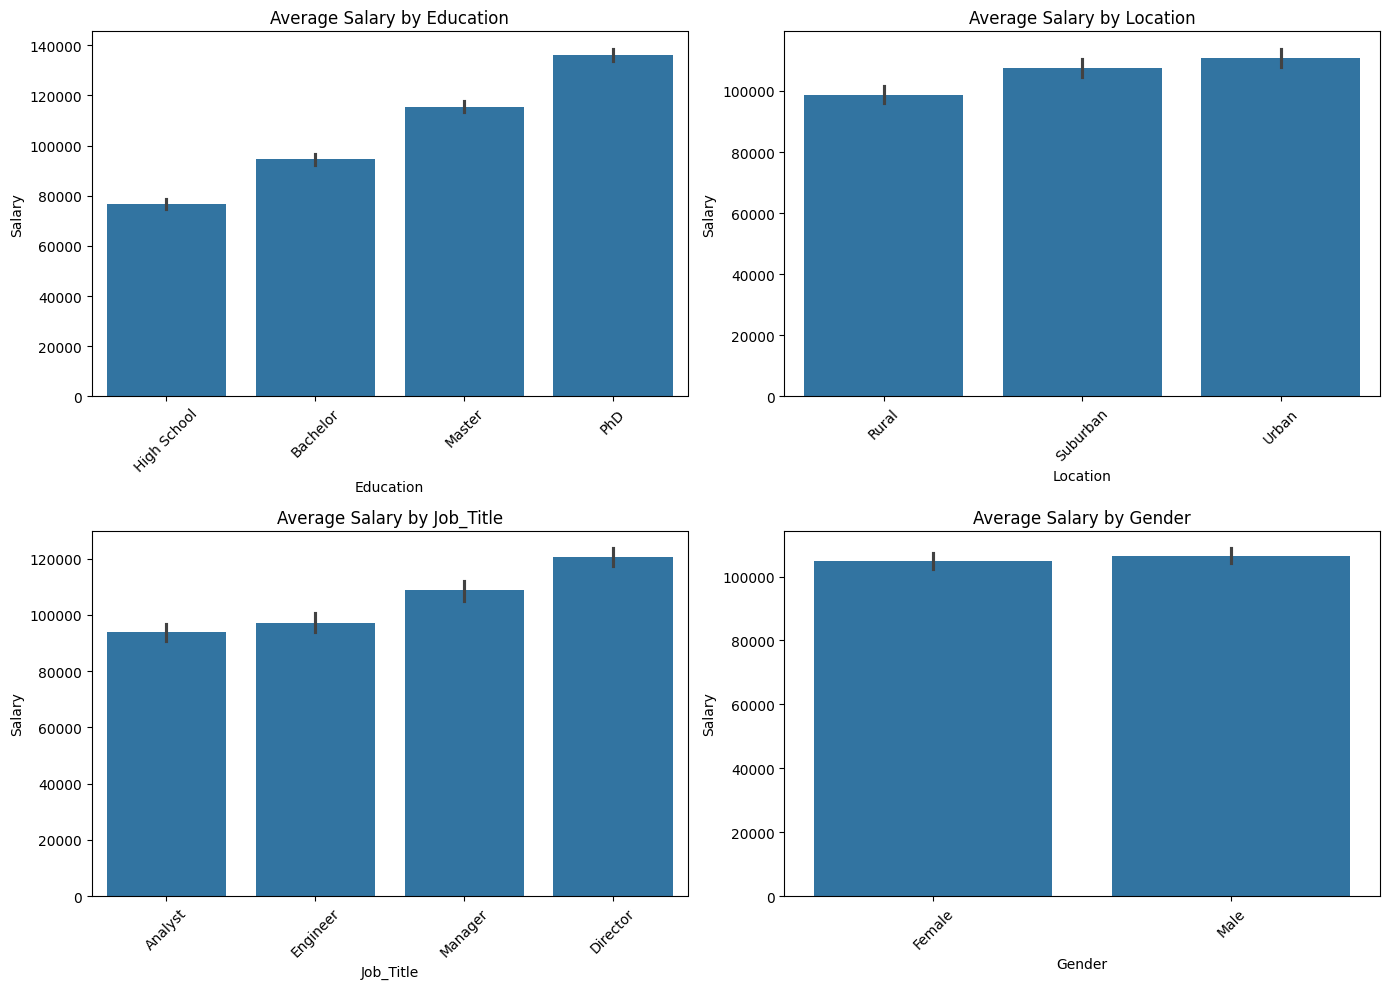

In [12]:
# List of your 4 categorical columns
cat_cols = ['Education', 'Location', 'Job_Title', 'Gender']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each countplot in its subplot
for i, col in enumerate(cat_cols):
    # Get sorted order by count (ascending)
    order = df.groupby(by=[col])["Salary"].mean().sort_values().index

    sn.barplot(data=df, x=col, y='Salary', order=order, ax=axes[i])
    axes[i].set_title(f'Average Salary by {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


> There is a clear upward trend between education level and salary — the chart demonstrates that individuals with higher academic qualifications tend to earn more, highlighting education as a strong determinant of salary. For both location and job title, a similar progression exists; however, the differences in average salaries are not significantly pronounced, as the values remain relatively close. Lastly, gender appears to have little to no influence on salary, with average earnings being nearly identical across genders.
>
> With these insights established, we now turn to more sophisticated multivariate analyses to uncover any hidden patterns or deeper relationships embedded within the dataset.


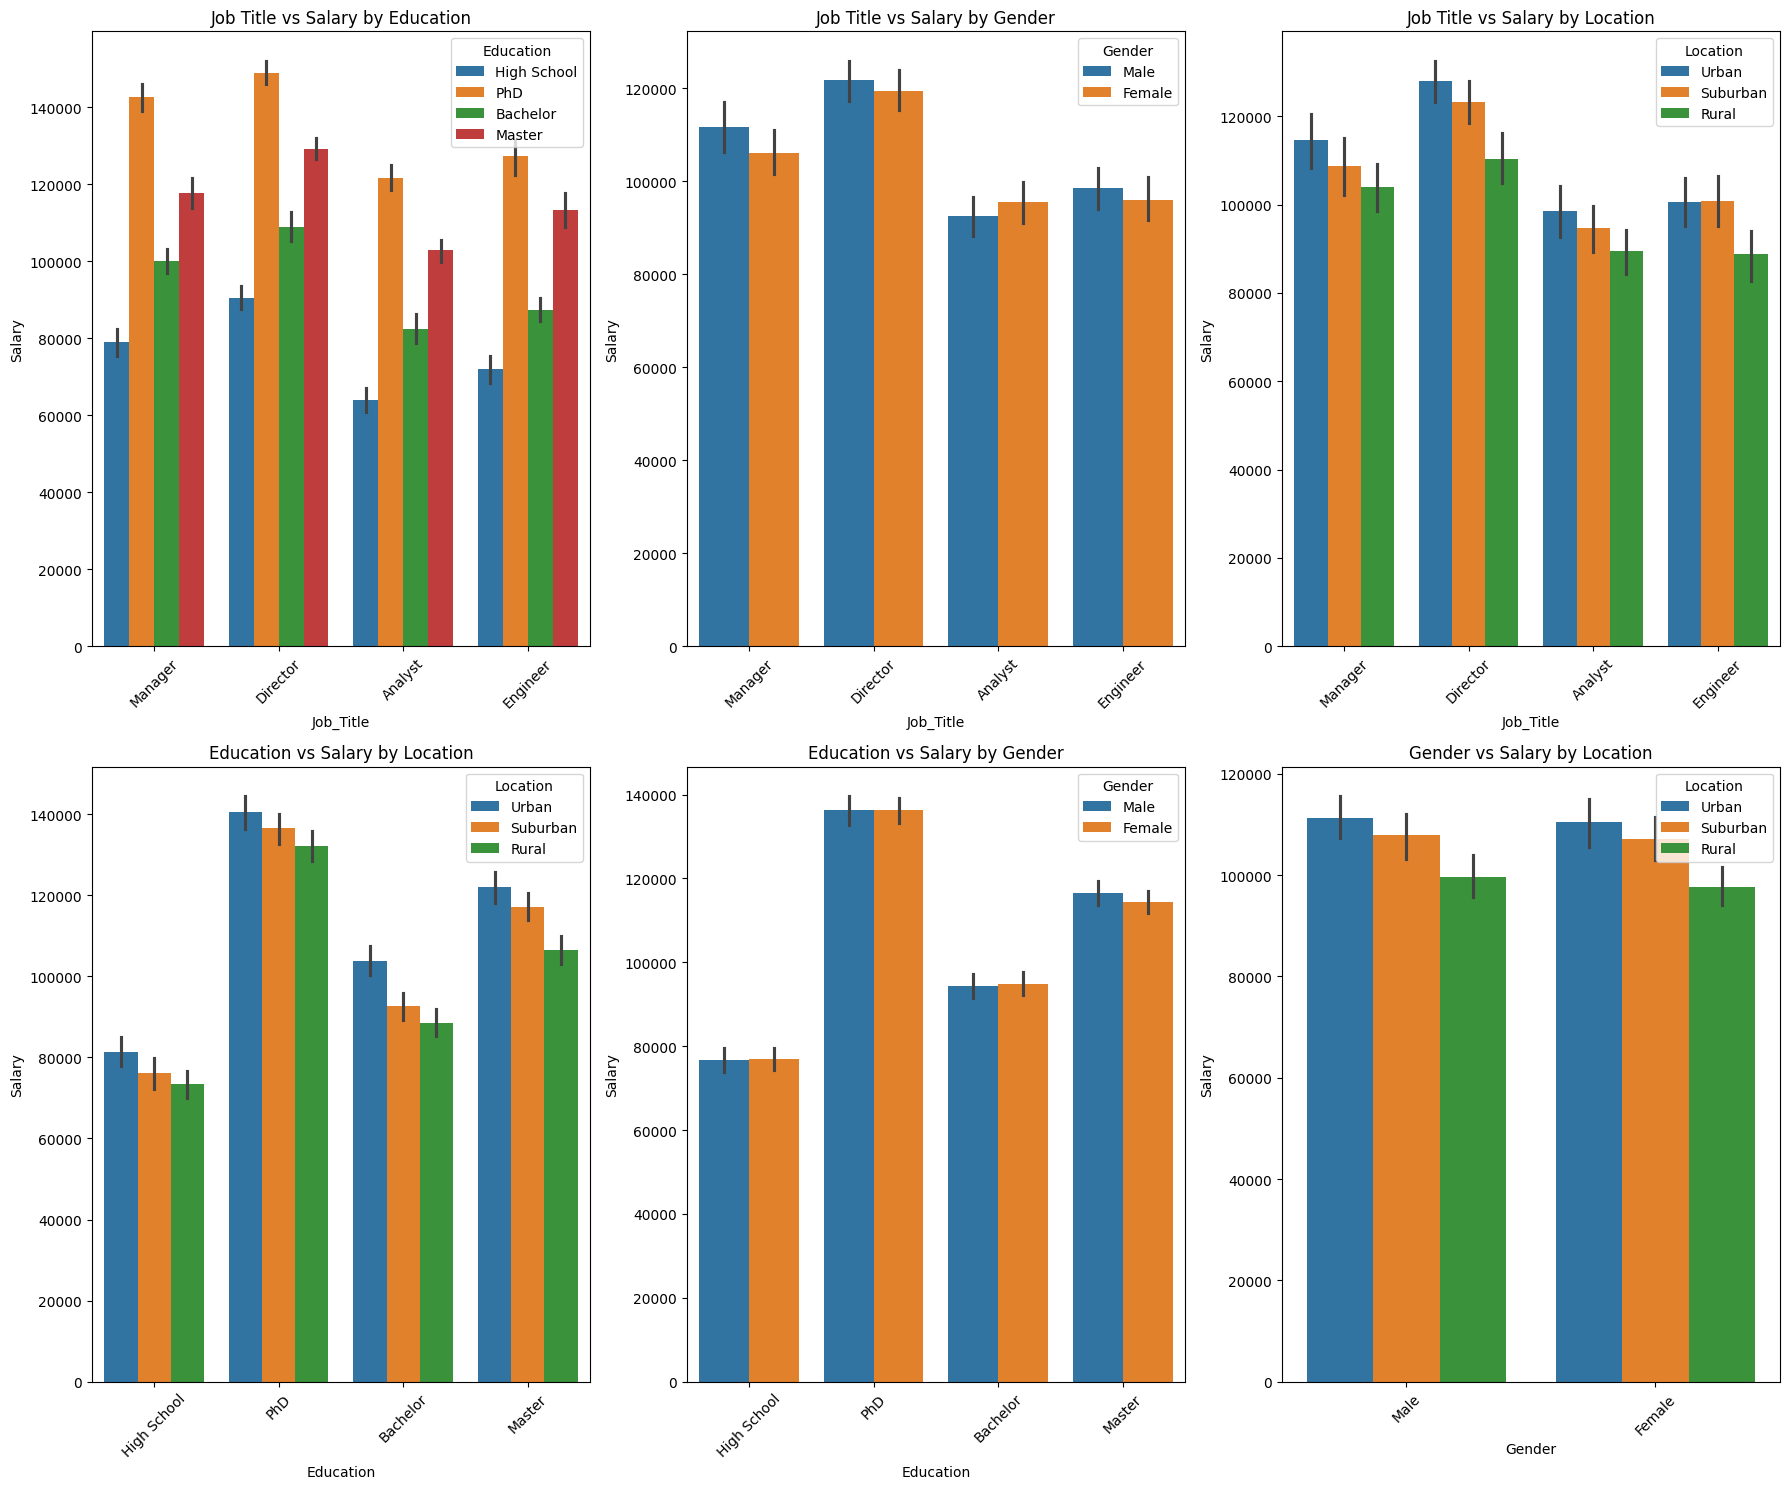

In [13]:
# Create 3x2 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
axes = axes.flatten()  # Make indexing easier

# Plot 1
sn.barplot(data=df, x='Job_Title', y='Salary', hue='Education', ax=axes[0])
axes[0].set_title('Job Title vs Salary by Education')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2
sn.barplot(data=df, x='Job_Title', y='Salary', hue='Gender', ax=axes[1])
axes[1].set_title('Job Title vs Salary by Gender')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3
sn.barplot(data=df, x='Job_Title', y='Salary', hue='Location', ax=axes[2])
axes[2].set_title('Job Title vs Salary by Location')
axes[2].tick_params(axis='x', rotation=45)

# Plot 4
sn.barplot(data=df, x='Education', y='Salary', hue='Location', ax=axes[3])
axes[3].set_title('Education vs Salary by Location')
axes[3].tick_params(axis='x', rotation=45)

# Plot 5
sn.barplot(data=df, x='Education', y='Salary', hue='Gender', ax=axes[4])
axes[4].set_title('Education vs Salary by Gender')
axes[4].tick_params(axis='x', rotation=45)

# Plot 6
sn.barplot(data=df, x='Gender', y='Salary', hue='Location', ax=axes[5])
axes[5].set_title('Gender vs Salary by Location')
axes[5].tick_params(axis='x', rotation=45)

# Improve layout
plt.tight_layout()
plt.show()


> All the subplots within the figure exhibit similar patterns across their axes, with one notable exception — the **Job Title vs. Salary by Gender** chart. For the roles of **Manager**, **Director**, and **Engineer**, males tend to have higher average salaries than females. However, for the **Analyst** role, the trend is reversed, with **females earning a higher average salary than males**. To better understand this anomaly, we will create a subset of the dataset containing only **Analyst** records and conduct a focused analysis on this group.


In [14]:
Analyst_df = df[df["Job_Title"] == "Analyst"]
Analyst_df.describe()

,Experience,Age,Salary
count,255.000000,255.000000,255.000000
mean,13.827451,42.752941,93801.761223
std,7.766881,13.437730,25160.595663
min,1.000000,20.000000,33510.510669
25%,7.000000,31.000000,72989.224301
50%,14.000000,43.000000,96310.924215
75%,20.000000,54.500000,112247.514677
max,29.000000,64.000000,149741.550275


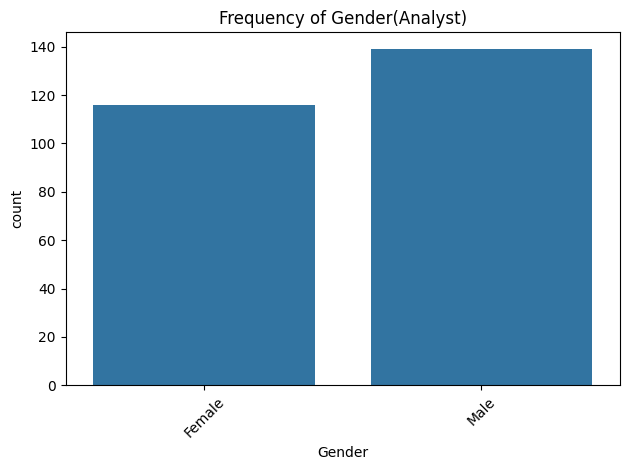

In [15]:
sn.countplot(data=Analyst_df, x="Gender")
plt.title(f'Frequency of Gender(Analyst)')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

>From the chart, it is evident that the population of female analysts is smaller than that of male analysts, indicating that the higher average salary for females in this role is not due to population imbalance.

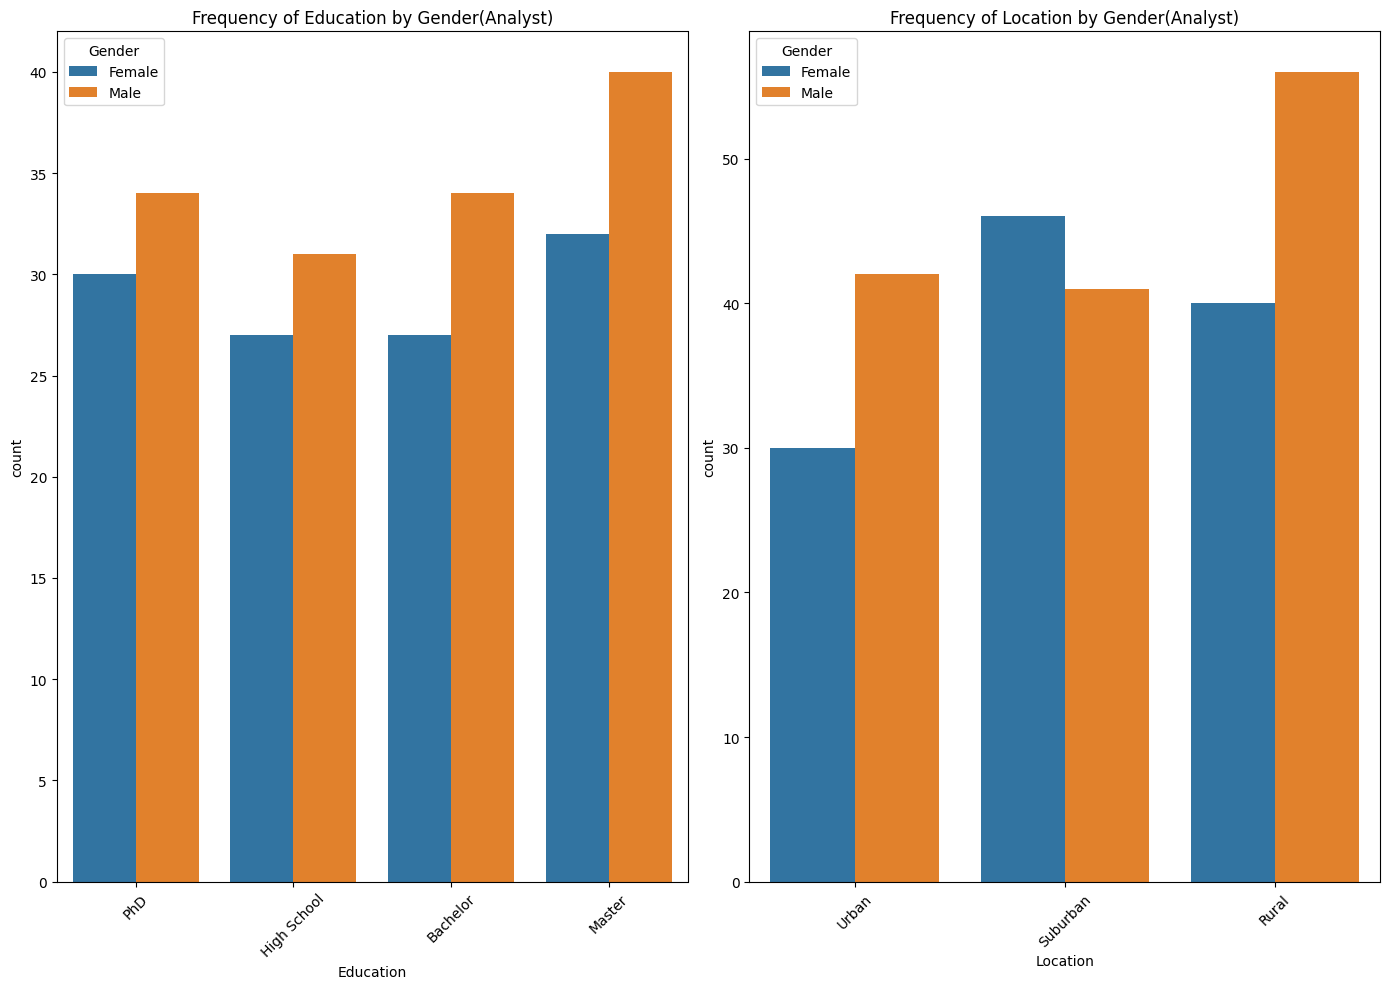

In [16]:
# List of your 4 categorical columns
cat_cols = ['Education', 'Location']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each countplot in its subplot
for i, col in enumerate(cat_cols):
    sn.countplot(data=Analyst_df, x=col, hue='Gender', ax=axes[i])
    axes[i].set_title(f'Frequency of {col} by Gender(Analyst)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


>Additionally, the distribution of education levels and locations among analysts does not provide a clear explanation for this salary difference. 

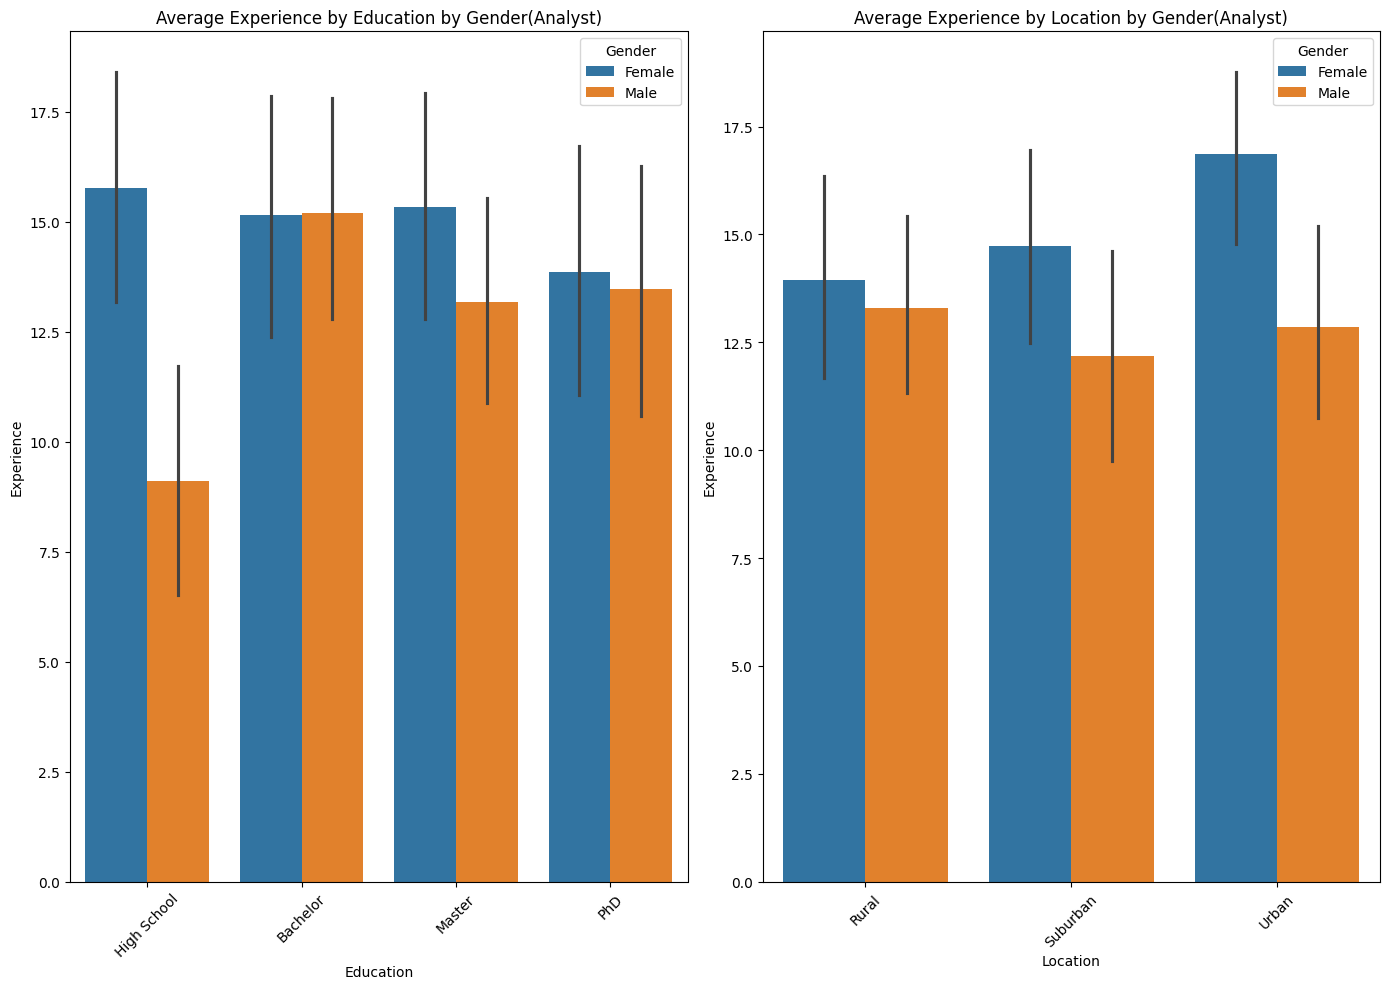

In [17]:
# List of your 4 categorical columns
cat_cols = ['Education', 'Location']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each countplot in its subplot
for i, col in enumerate(cat_cols):
    # Get sorted order by count (ascending)
    order = Analyst_df.groupby(by=[col])["Salary"].mean().sort_values().index

    sn.barplot(data=Analyst_df, x=col, y='Experience', order=order, hue='Gender', ax=axes[i])
    axes[i].set_title(f'Average Experience by {col} by Gender(Analyst)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


>The chart shows that female analysts tend to have higher levels of experience compared to their male counterparts, regardless of their location or educational background. This suggests that experience plays a significant role in determining salary for the Analyst role. Therefore, it can be concluded that the higher average salary among female analysts is likely influenced by their greater experience, rather than differences in education, location, or gender alone.

### 📋 **Summary**

The analysis revealed several key insights:

1. The dataset is **balanced and unbiased**, with no significant issues in representation.
2. Both **age and experience** exhibit **bimodal distributions**, indicating distinct clusters of individuals.
3. **Education level** has a strong positive relationship with salary — the higher the degree, the higher the earnings.
4. **Experience** is also a strong determinant of salary, showing a clear progression in compensation with more years in the workforce.
5. There is a **moderate relationship** between **location** and **job title** with salary, though not as pronounced.
6. **Gender and age**, however, show **little to no influence** on salary, making them weak predictors in this dataset.

## Model Development

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

To ensure robust model evaluation and prevent overfitting, the dataset was initially split into an 80:20 ratio, where 20% was reserved as the test set for final performance assessment. The remaining 80% was further divided into 90:10, allocating 90% for training and 10% for validation. This approach allows the model to learn from the training data, tune hyperparameters using the validation set, and be evaluated on an unseen test set — providing a reliable measure of generalization performance.

In [19]:
X = df.drop(["Salary"], axis=1)
y = df["Salary"]

In [20]:
#first split 80:20
X_df, X_test, y_df, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Second Split 90:10
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.1, random_state=42)

In [21]:
print('Train set: ', X_train.shape[0])
print('Validation set: ', X_val.shape[0])
print('Test set: ', X_test.shape[0])

Train set:  720
Validation set:  80
Test set:  200


### 🔧 Feature Engineering Summary

The following feature engineering steps were applied based on insights drawn from the exploratory analysis:

1. **Ordinal Encoding for Education**:
   The `Education` column was ordinally encoded because the education levels demonstrated a clear progression in average salary — higher academic qualifications consistently correlated with higher pay, making the order meaningful.

2. **Creation of Gender\_JobTitle Feature**:
   A new feature, `Gender_JobTitle`, was generated by concatenating the `Gender` and `Job_Title` columns. This was specifically designed to capture hidden interactions — particularly the observed case where **female analysts** had higher average salaries, likely due to higher experience levels.

3. **One-Hot Encoding for Categorical Variables**:
   One-hot encoding was applied to `Gender_JobTitle`, `Job_Title`, and `Location`. These features were encoded this way because their unique categories did not exhibit significant ordinal relationships with salary, making one-hot encoding more suitable for preserving category distinctions without imposing order.

4. **Exclusion of Age**:
   The `Age` column was excluded from the modeling process as it showed **no meaningful correlation** with salary in the analysis, indicating low predictive value.

In [22]:
##Ordinal Encode Education
# Define the order of education levels
edu_order = ['High School', 'Bachelor', 'Master', 'PhD']
# Map to ordinal values
X_train['Education_encoded'] = X_train['Education'].map({edu: i for i, edu in enumerate(edu_order)})


##One-Hot Encode combine column
# Concatenate Gender and Job_Title
X_train['Gender_JobTitle'] = X_train['Gender'] + "_" + X_train['Job_Title']

# One-Hot Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit on training categorical columns
X_train_cat = encoder.fit_transform(X_train[['Gender_JobTitle', 'Job_Title', 'Location']])
# Get column names for encoded features
encoded_columns = encoder.get_feature_names_out(['Gender_JobTitle', 'Job_Title', 'Location'])
# Convert to DataFrame
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_columns, index=X_train.index)

X_train_encoded = pd.concat([X_train[['Education_encoded', 'Experience']], X_train_cat_df], axis=1)


In [23]:
X_train_encoded

,Education_encoded,Experience,Gender_JobTitle_Female_Director,Gender_JobTitle_Female_Engineer,Gender_JobTitle_Female_Manager,Gender_JobTitle_Male_Analyst,Gender_JobTitle_Male_Director,Gender_JobTitle_Male_Engineer,Gender_JobTitle_Male_Manager,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager,Location_Suburban,Location_Urban
940,1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0,18,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
900,3,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,3,29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
348,3,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3,29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
334,3,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
409,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,3,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


After successfully preprocessing the dataset, the resulting DataFrame contains a total of 14 columns, as reflected in the updated table below.

### Model Training

In [24]:
model = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              "positive": [True, False],
              'n_jobs': [1, -1]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train_encoded, y_train)
print("Train RMSE ", (-grid_search.best_score_)**0.5)

Train RMSE  9872.867587079467


### Model performance Evaluation

In [25]:
##Ordinal Encode Education
# Map to ordinal values
X_val['Education_encoded'] = X_val['Education'].map({edu: i for i, edu in enumerate(edu_order)})

##One-Hot Encode combine column
# Concatenate Gender and Job_Title
X_val['Gender_JobTitle'] = X_val['Gender'] + "_" + X_val['Job_Title']

# Fit on training categorical columns
X_val_cat = encoder.transform(X_val[['Gender_JobTitle', 'Job_Title', 'Location']])
# Convert to DataFrame
X_val_cat_df = pd.DataFrame(X_val_cat, columns=encoded_columns, index=X_val.index)

X_val_encoded = pd.concat([X_val[['Education_encoded', 'Experience']], X_val_cat_df], axis=1)


In [26]:
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_encoded)

rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 11131.435558890944


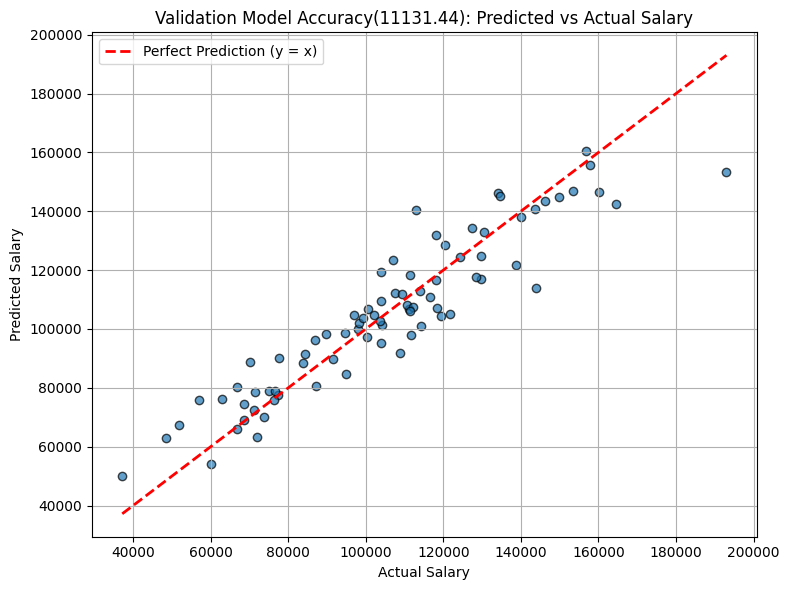

In [27]:
# Scatter plot to show model accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.7, edgecolors='k')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction (y = x)')
plt.title('Validation Model Accuracy(11131.44): Predicted vs Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot above shows the actual salaries (x-axis) versus predicted salaries (y-axis). Points closer to the red dashed line (y = x) represent more accurate predictions.

✅ The tighter the cluster around the line, the more accurate the model.
🔍 Deviations from the line indicate prediction error — wider spread means more variance.

In [28]:
##Ordinal Encode Education
# Map to ordinal values
X_test['Education_encoded'] = X_test['Education'].map({edu: i for i, edu in enumerate(edu_order)})

##One-Hot Encode combine column
# Concatenate Gender and Job_Title
X_test['Gender_JobTitle'] = X_test['Gender'] + "_" + X_test['Job_Title']

# Fit on training categorical columns
X_test_cat = encoder.transform(X_test[['Gender_JobTitle', 'Job_Title', 'Location']])
# Convert to DataFrame
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_columns, index=X_test.index)

X_test_encoded = pd.concat([X_test[['Education_encoded', 'Experience']], X_test_cat_df], axis=1)


In [29]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_encoded)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {rmse}")

Test RMSE: 10239.831493011476


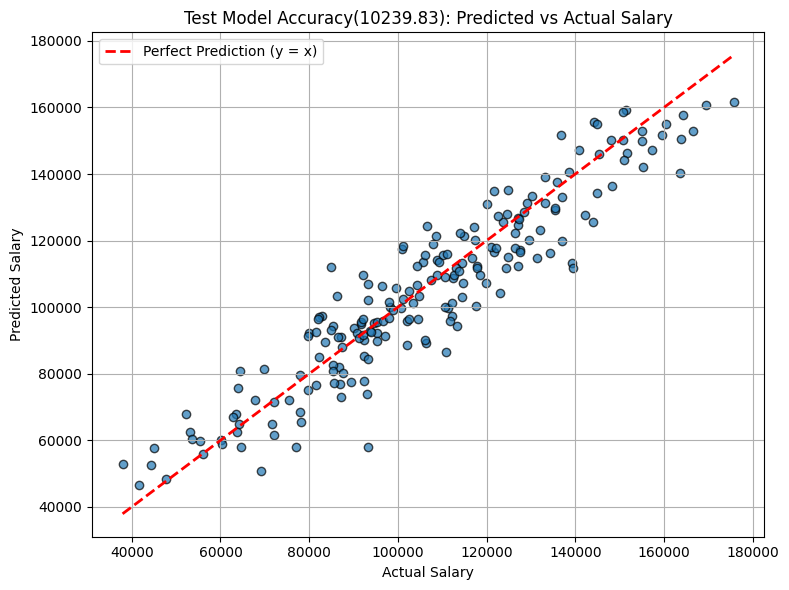

In [30]:
# Scatter plot to show model accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction (y = x)')
plt.title('Test Model Accuracy(10239.83): Predicted vs Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot above shows the actual salaries (x-axis) versus predicted salaries (y-axis). Points closer to the red dashed line (y = x) represent more accurate predictions.

✅ The tighter the cluster around the line, the more accurate the model.
🔍 Deviations from the line indicate prediction error — wider spread means more variance.

### 📊 Model Evaluation Summary
The model was evaluated using multiple stages, and the results demonstrate consistent performance:

Cross-Validation (Training Phase): RMSE = 9,872.87

Validation Set: RMSE = 11,131.43

Test Set: RMSE = 10,239.00

These results indicate that the model generalizes well and is not overfitting the training data. The close range of RMSE values across all stages suggests that the model maintains strong predictive accuracy, making it suitable and ready for deployment on real-world data.


### ✅ Final Conclusion:

The project effectively analyzed salary data, revealing **education level** and **experience** as key salary predictors. After feature engineering and model development using **linear regression**, the model achieved strong performance with RMSE scores of **9,872.87 (cross-validation)**, **11,131.43 (validation)**, and **10,239.00 (test)**. These consistent results indicate that the model generalizes well and is suitable for reliable real-world salary prediction.


### 🔮 Future Work:

To enhance this project further:

1. **Expand the Dataset**: Collecting more diverse and comprehensive data can improve the model's accuracy and generalizability.
2. **Advanced Modeling**: Future iterations could explore more complex models (e.g., ensemble methods) to capture non-linear patterns and improve performance.
3. **Model Deployment**: The model can be deployed using cloud platforms or embedded into production systems to support real-time salary predictions.